In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
plt.rcParams['agg.path.chunksize'] = 1000

In [3]:
df = pd.read_csv(r"C:/Users/argyropoulos_c/Downloads/Telegram Desktop/result.csv", parse_dates=['snap_date'])
df_days = df[['snap_date','days']]
df_days = df_days.sort_values(by=['snap_date'])

C:\Users\argyropoulos_c\AppData\Local\Temp\ipykernel_14564\1195495300.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:/Users/argyropoulos_c/Downloads/Telegram Desktop/result.csv", parse_dates=['snap_date'])


In [12]:
df_count_perdate = df_days.groupby(df['snap_date'].dt.date)[['days']].count()

In [9]:
# df_clean.set_index('snap_date', inplace=True)
# df_clean.sort_index()
# print(df_clean.head())

In [13]:
rolling_mean = df_count_perdate.rolling(7).mean()
rolling_std = df_count_perdate.rolling(7).std()

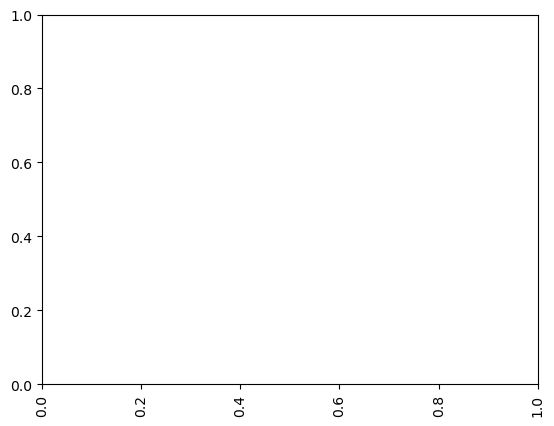

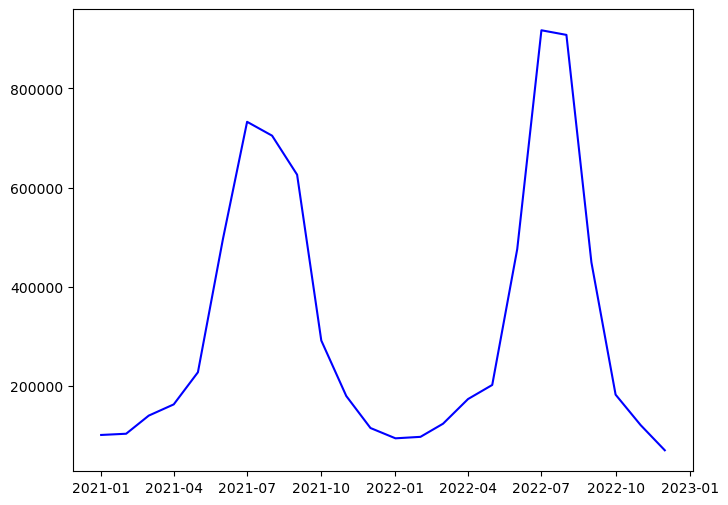

In [14]:
_ = plt.xticks(rotation=90)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_count_perdate, color="blue",label="Original tourist data")

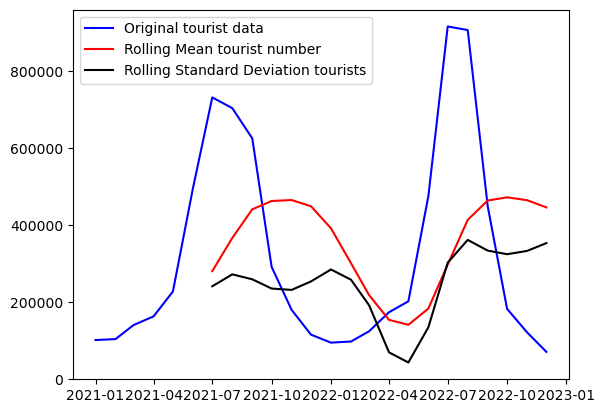

In [15]:
plt.plot(df_count_perdate, color="blue",label="Original tourist data")
plt.plot(rolling_mean, color="red", label="Rolling Mean tourist number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation tourists")
plt.legend(loc="best")

In [29]:
adft = adfuller(df_clean,autolag="AIC")
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

      Values                       Metric
0  -3.205318              Test Statistics
1   0.019679                      p-value
2   9.000000             No. of lags used
3  14.000000  Number of observations used
4  -4.012034          critical value (1%)
5  -3.104184          critical value (5%)
6  -2.690987         critical value (10%)


In [30]:
autocorrelation_lag1 = df_count_perdate['days'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.7473825626315135


In [31]:
autocorrelation_lag3 = df_count_perdate['days'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df_count_perdate['days'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df_count_perdate['days'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

Three Month Lag:  -0.2764128368061294
Six Month Lag:  -0.6780796153530773
Nine Month Lag:  0.02080816483936865


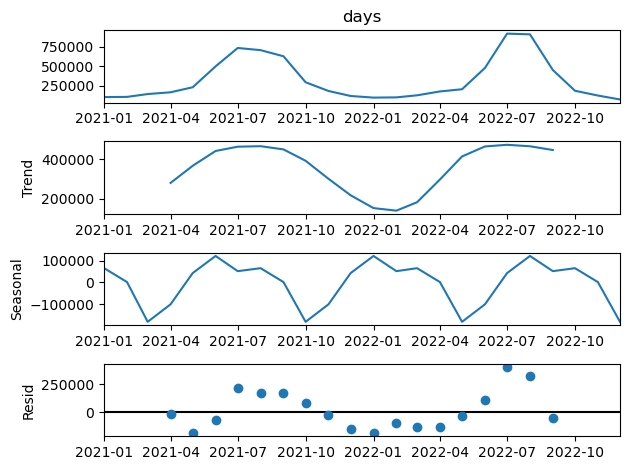

In [32]:
decompose = seasonal_decompose(df_count_perdate['days'],model='additive', period=7)
decompose.plot()
plt.show()

C:\Users\argyropoulos_c\AppData\Local\Temp\ipykernel_18956\4218097644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['days']
C:\Users\argyropoulos_c\AppData\Local\Temp\ipykernel_18956\4218097644.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['days']


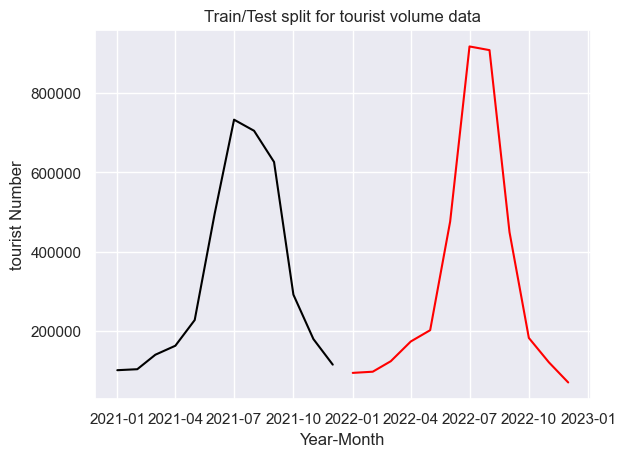

In [57]:
train = df_count_perdate.iloc[:12]
train['train'] = train['days']
del train['days']
test = df_count_perdate.tail(12)
test['test'] = test['days']
del test['days']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for tourist volume data")
plt.ylabel("tourist Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [58]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=334.894, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=326.335, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=329.912, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=345.646, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=320.400, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=321.562, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=324.730, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=325.074, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=323.312, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=322.705, Time=0.05 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.835 seconds


In [59]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  300206.59135376493


# Map of tourist volume
We can visualise the amount of tourists per city, and differentiate per year

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error
# Viz part
import seaborn as sns
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv(r"C:/Users/argyropoulos_c/Downloads/Telegram Desktop/result.csv", parse_dates=['snap_date'])

In [31]:
df_map = df[['snap_date','city','gender','age','days']]

In [32]:
df_map.set_index('snap_date', inplace=True)

<AxesSubplot:xlabel='days', ylabel='count'>

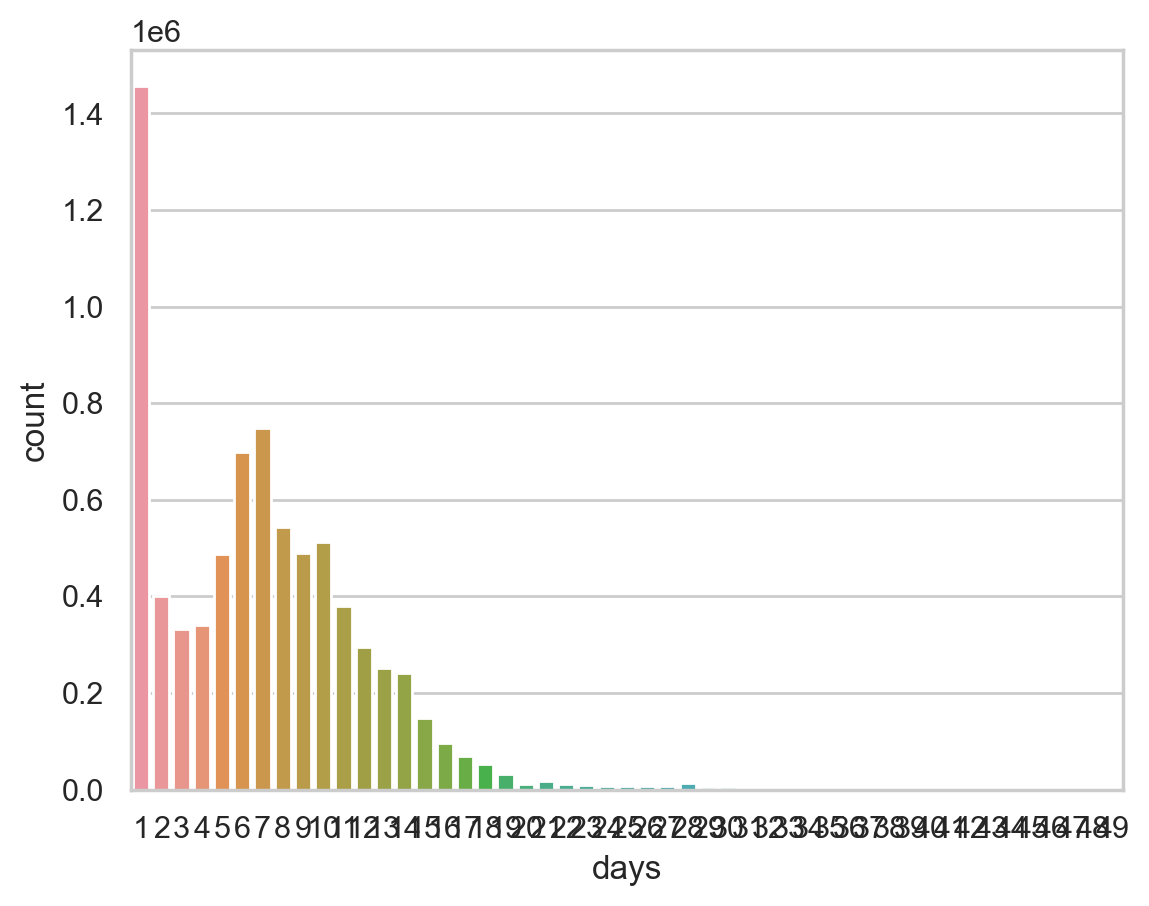

In [34]:
sns.countplot(df_map['days'])


<AxesSubplot:xlabel='days', ylabel='city'>

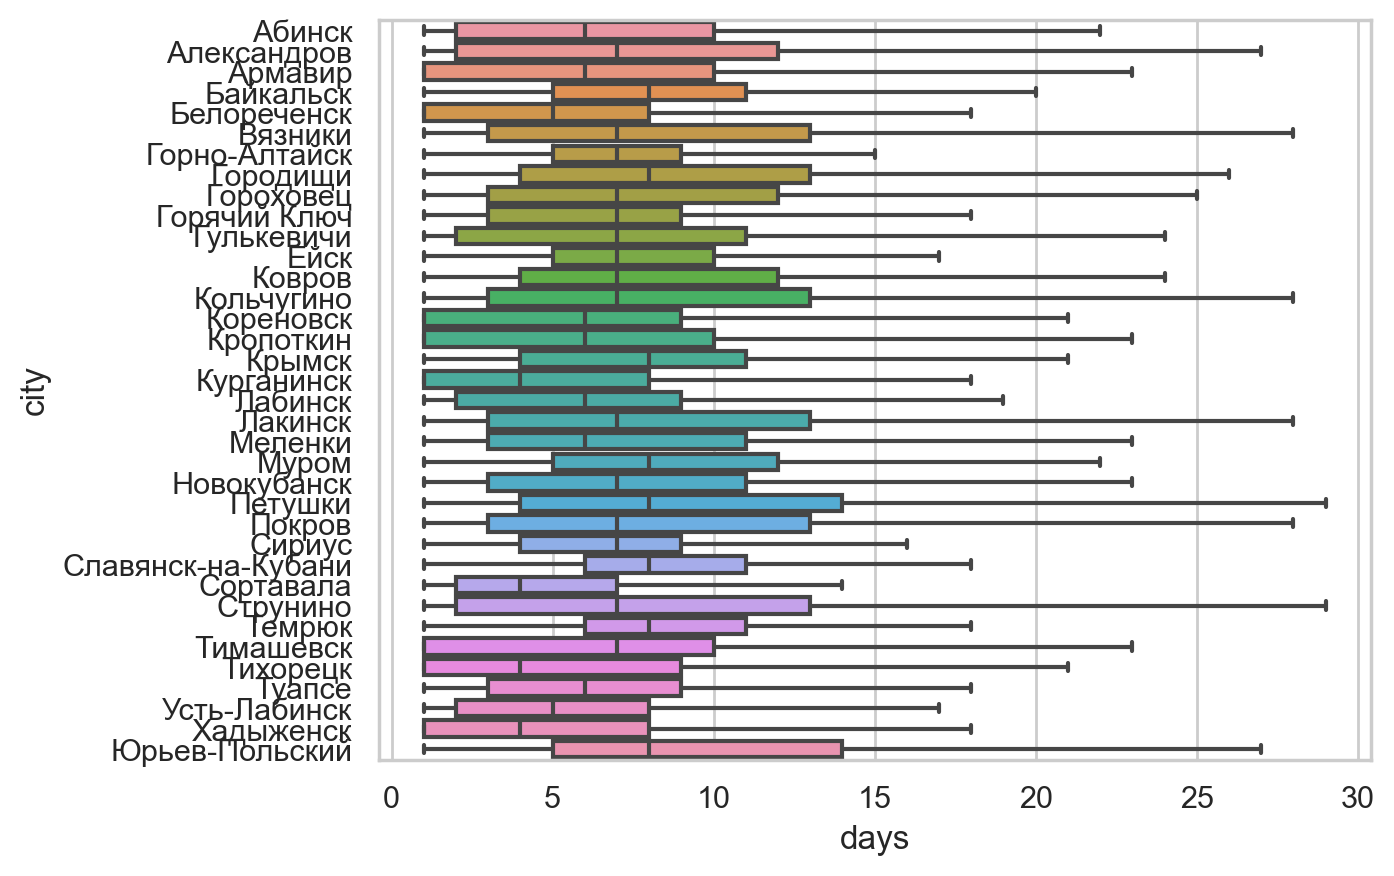

In [49]:
sns.boxplot(data=df_map, x='days', y='city', showfliers = False)

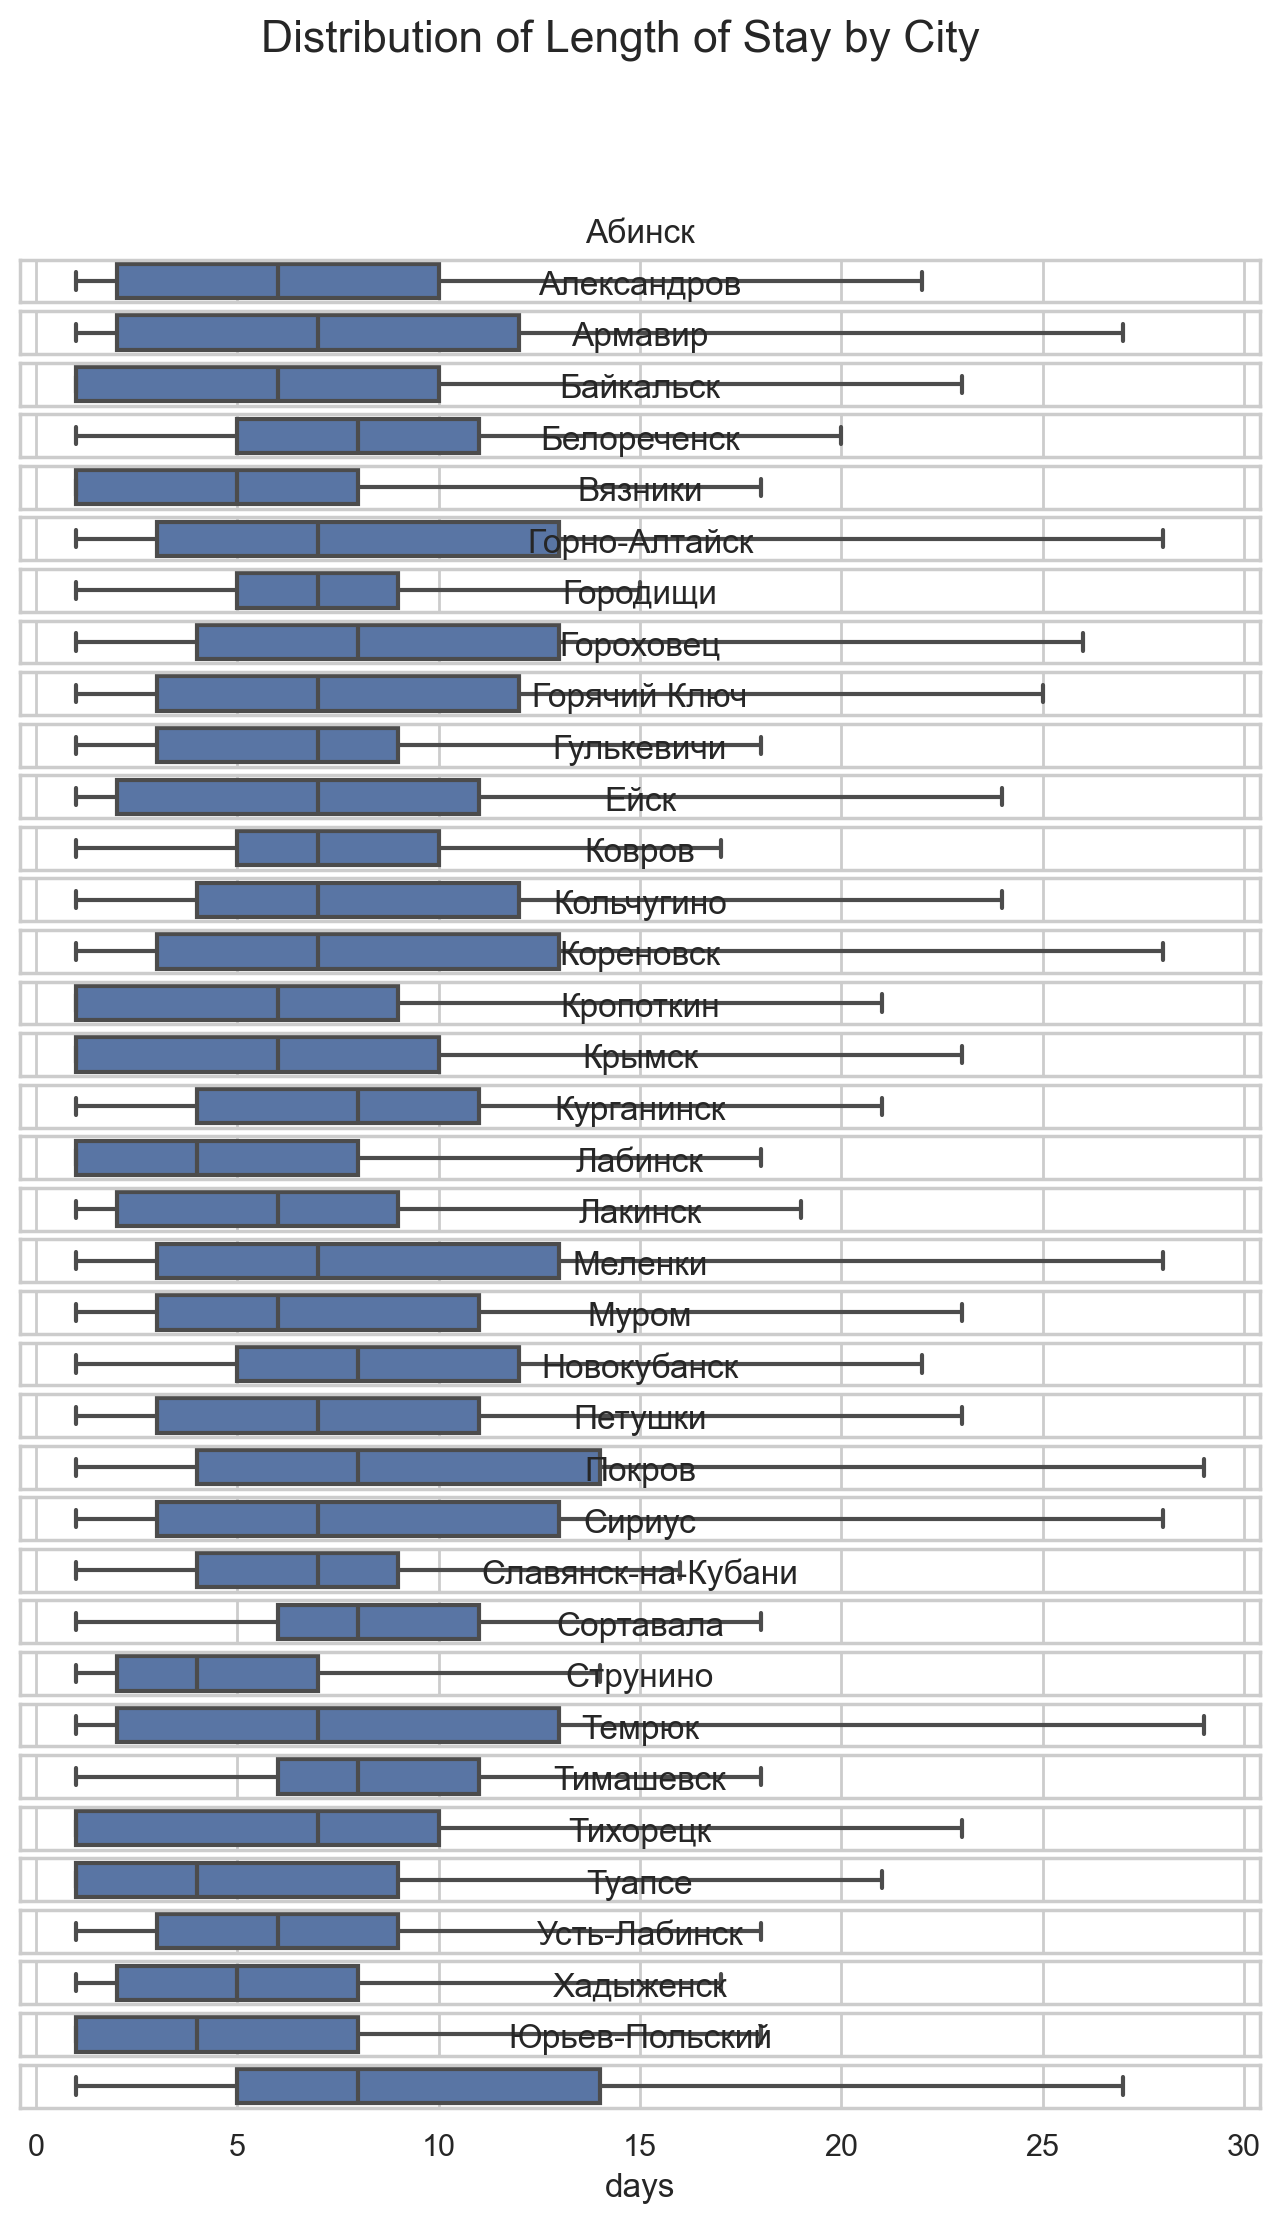

In [45]:
# Create a list of cities in the dataset
cities = df_map['city'].unique()

# Set up the plot
fig, axs = plt.subplots(len(cities), figsize=(8, 12), sharex=True)
sns.set(style = 'whitegrid') 
# Loop over each city and create a boxplot
for i, city in enumerate(cities):
    city_data = df_map[df_map['city'] == city]['days']
    sns.boxplot(city_data, ax=axs[i], showfliers = False)
    axs[i].set_title(city)

# Add a global title to the plot
fig.suptitle('Distribution of Length of Stay by City', fontsize=16)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

In [53]:
print(df_map['days'].dtype)
df_map["avg_days"] = df_map.groupby('city')['days'].mean()

In [54]:
df_map

,city,gender,age,days,avg_days
snap_date,,,,,
2021-07-01,Абинск,1,47,3,NaN
2021-07-01,Абинск,2,28,15,NaN
2021-07-01,Абинск,1,36,5,NaN
2021-07-01,Абинск,2,34,11,NaN
2021-07-01,Абинск,2,33,1,NaN
...,...,...,...,...,...
2022-12-01,Юрьев-Польский,1,32,9,NaN
2022-12-01,Юрьев-Польский,1,41,7,NaN
2022-12-01,Юрьев-Польский,1,36,1,NaN


In [68]:
import geocoder
from pprint import pprint
key = '484ae73bfa5b43d28bde740af59c0c0c' # get api key from: https://opencagedata.com
cities = dict.fromkeys(df_map['city'])
for name in cities:
    result = geocoder.opencage(name, key=key)
    cities[name] = result.latlng

In [78]:
#Transform, rename, merge
cities_distance = pd.DataFrame.from_dict(cities, orient='index',columns=['lat','long'])
cities_distance.index.name = 'city'
df_map_city = df_map.merge(cities_distance, left_on='city', right_on='city')

In [113]:
df_map_city['volume'] = df.groupby('city')['city'].transform('count')

In [122]:
viz_RU = df_map_city.groupby('city').first().reset_index()

In [126]:
viz_RU

,city,snap_date,gender,age,lat,long,volume
0,Абинск,2021-07-01,1,47,44.864953,38.157819,112819
1,Александров,2021-07-01,2,42,56.396229,38.711110,102225
2,Армавир,2021-07-01,1,58,44.999358,41.129406,232276
3,Байкальск,2021-07-01,1,39,51.517192,104.141026,84722
4,Белореченск,2021-07-01,2,47,44.761415,39.871294,107387
5,Вязники,2021-07-01,1,38,56.245140,42.137577,162440
6,Горно-Алтайск,2021-07-01,1,40,51.957775,85.963653,107472
7,Городищи,2021-07-01,2,39,55.869729,39.094127,53052
8,Гороховец,2021-07-01,3,30,56.206570,42.679035,194968
9,Горячий Ключ,2021-07-01,2,34,44.634265,39.136361,833511


In [130]:
import plotly.express as px
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(viz_RU, 
                        lat="lat", 
                        lon="long", 
                        hover_name="city", 
                        hover_data=["volume"],
                        color="city",
                        color_continuous_scale=color_scale,
                        size="volume",
                        zoom=8, 
                        height=700,
                        width=700)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()